## 목차

- [Decision Tree](#Decision-Tree)
  - 개요
  - 특징
  - 파라미터
  - 시각화
  - 실습 - 사용자 행동 인식 데이터 세트
- [Ensemble Learning](#Ensemble-Learning)
  - 개요
  - Voting Classifier - 위스콘신 유방암 데이터세트
- [Random Forest](#Random-Forest)
  - 개요
  - 하이퍼 파라미터 및 튜닝
- [GBM(Gradient Boosting Machine)](#GBM(Gradient-Boosting-Machine))
  - 개요
  - 하이퍼 파라미터 및 튜닝

# Decision Tree

## 개요

- Decision Tree는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 Tree 기반의 분류 규칙을 만드는 것
- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다. 이를 위해서는 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요하다.
- 정보의 균일함을 측정하는 대표적인 방법은 엔트로피를 이용한 Information Gain(정보 이득) 지수와 지니 계수가 있다.


## 특징

- 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다.
- 룰이 매우 명확하고 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화로 표현할 수 있다.
- 정보의 균일도만 신경쓰므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다.
- 하지만 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점이다. 이를 극복하기 위해 Tree의 크기를 사전에 제한하는 튜닝이 필요하다.

## 파라미터

- DecisionTreeClassifier, DecisionTreeRegressor 파라미터 동일
- min_samples_split - 노드를 분할하기 위한 최소한의 샘플 데이터 수, 과적합 제어하는 데 사용, default = 2
- min_samples_leaf - Leaf가 되기 위한 최소한의 샘플 데이터 수, 과적합 제어 용도, 비대칭적 데이터의 경우 작게 설정 필요
- max_features - 최적의 분할을 위해 고려할 최대 피처 개수, default = None
- max_depth - 트리의 최대 깊이를 규정, default = None
- max_leaf_nodes - Leaf의 최대 개수

## 시각화
- 붓꽃 데이터 세트를 DecisionTreeClassifier를 이용해 학습한 뒤, 어떠한 형태로 규칙 트리가 만들어지는지 확인해 본다.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

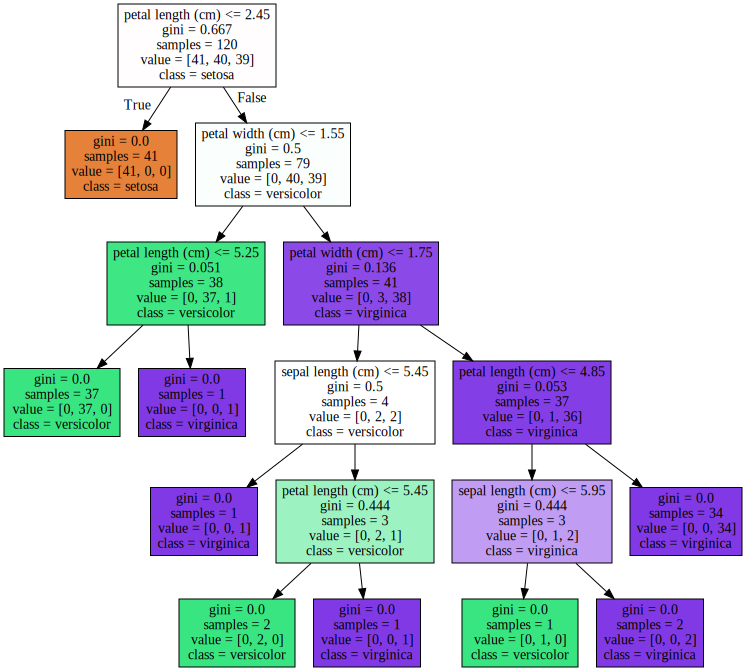

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 리프 노드는 조건 없음
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples는 현 규칙에 해당하는 데이터 건수
- value=[]는 클래스 값 기반의 데이터 건수

## 실습 - 사용자 행동 인식 데이터 세트
- Decision Tree를 이용해 UCI 머신러닝 리포지토리에서 제공하는 사용자 행동 인식 데이터셋에 대한 예측 분류를 수행
- 해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z축 값으로 되어있음을 유추할 수 있다.
- 위 features.txt는 중복된 피처명을 가지고 있다. 이 중복된 피처명들을 이용해 데이터 파일을 데이터세트 DataFrame에 로드하면 오류 발생

In [5]:
#중복된 피처명이 얼마나 있는지 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3

- 총 42개의 피처명이 중복되어 있음
- 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명을 가ㅣ는 DataFrame을 반환하는 함수를 정의

In [6]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [7]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [9]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


- 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


- 하이퍼 파라미터를 모두 디폴트 값으로 수행하니 약 85.48%의 정확도를 나타낸다.

- depth를 계속 늘리면서 예측 성능을 측정 (교차 검증은 5)

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [12]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

param_max_depth  mean_test_score
0               6         0.850791
1               8         0.851069
2              10         0.851209
3              12         0.844135
4              16         0.851344
5              20         0.850800
6              24         0.849440

In [13]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


- max_depth가 8일 때 정점이고 이를 넘어가면 정확도가 계속 떨어진다
- 깊어진 트리는 검증 데이터셋에서 과적합으로 인한 성능 저하를 유발한다.

In [14]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.0min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


- max_depth가 8, min_samples_split이 16일 때 가장 최고의 정확도 85.5%를 나타낸다.
- 이를 이용해 테스트 데이터셋에 예측 수행

In [15]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


- 마지막으로 결정 트리에서 각 피처의 중요도를 feature_importances_속성을 이용해 알아본다.
- 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현

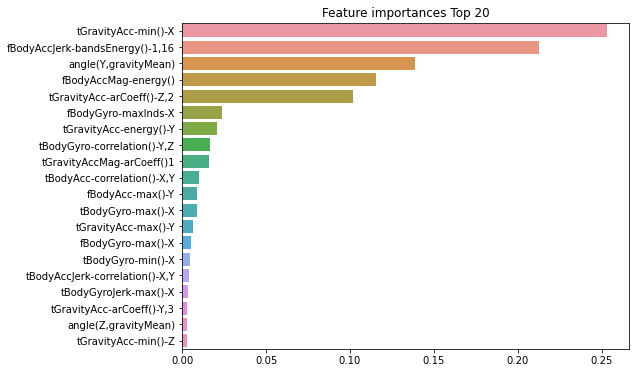

In [16]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# Ensemble Learning

## 개요

- 앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다.
- 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것이다.

- 앙상블 학습의 유형은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있으며, 이 외에도 다양한 앙상블 방법이 있다.
- Voting과 Bagging은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 다른 점은 Voting의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, Bagging의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 Voting을 수행하는 것이다.
- 대표적인 Bagging 방식이 바로 RandomForest Algorithm 이다.

## Voting Classifier - 위스콘신 유방암 데이터세트
- Voting 방식의 앙상블을 이용해 위스콘신 유방암 데이터세트 예측 분석
- 데이터셋은 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터셋이며 종양의 크기, 모양 등 다양하고 많은 피처를 가지고 있다.
- 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만든다.

In [17]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 30 columns]

In [18]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


- Voting 분류기 정확도가 조금 높게 나타났다. 
- Voting으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않는다.

# Random Forest

## 개요

- Random Forest의 기반 알고리즘은 Decision Tree로서, 쉽고 직관적인 장점을 그대로 가져왔다.
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 한다.
- 개별적인 분류기의 기반 알고리즘은 결정 트리지만 개별 트리가 학습하는 데이터셋은 전체 데이터에서 일부가 중첩되게 샘플링된 데이터셋이다. 
- 이렇게 여러 개의 데이터셋을 중첩되게 분리하는 것을 Bootstrapping 분할 방식이라고 한다.
- 데이터가 중첩된 개별 데이터셋에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트이다.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


- 랜덤 포레스트는 사용자 행동 인식 데이터셋에 대해 약 91.08%의 정확도이다.

## 하이퍼 파라미터 및 튜닝

- GridSearchCV를 이용해 하이퍼 파라미터 튜닝
- 튜닝 시간을 절약하기 위해 n_estimators는 100으로, CV를 2로만 설정하여 최적 하이퍼 파라미터를 구한다.

In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


- n_estimators를 300으로 증가시키고, 최적화 하이퍼 파라미터로 다시 학습시킨 뒤 테스트 데이터셋에서 예측 성능을 측정

In [21]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


- 별도의 테스트 데이터셋에서 수행한 예측 정확도 수치는 약 91.65%
- feature_importances_속성을 이용해 알고리즘이 선택한 피처의 중요도 확인

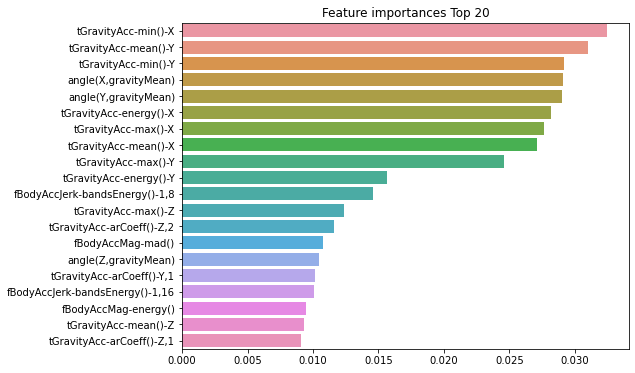

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# GBM(Gradient Boosting Machine)

## 개요

- 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 부스팅의 대표적인 구현은 AdaBoost와 Gradient Boost가 있다.
- GBM은 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용한다.
- 사이킷런의 GradientBoostingClassifier 클래스로 사용자 행동 데이터셋을 예측 분류

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 678.2 초 


- 기본 하이퍼 파라미터만으로 93.76%의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냄
- 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 조금 뛰어난 경우가 많다. 그러나 시간이 오래걸리고 하이퍼 파라미터 튜닝 노력도 더 필요함

## 하이퍼 파라미터 및 튜닝

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 119.7min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9011


- learning_rate가 0.05, n_estimators가 500일 때 2개의 교차 검증 세트에서 90.1%의 정확도로 최고로 도출되었다.
- 이 설정을 그대로 테스트 데이터셋에 적용해 예측 정확도를 확인

In [25]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9420


- 테스트 데이터셋에서 약 94.1%의 정확도가 도출되었다.
- GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘
- 단점은 수행 시간이 오래 걸린다는 것.